<a href="https://colab.research.google.com/github/Elians001/proyecto_modelo/blob/main/PROYECTO_MODELO_PREDICTIVO_RAYOSX_Elias_Salazar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import requests

# URL al archivo Excel en GitHub
url = "https://github.com/Elians001/proyecto_modelo/raw/main/Dataset_Clinico_Clasificado_FINAL.xlsx"

# Descargar el archivo
response = requests.get(url)
with open("Dataset.xlsx", "wb") as f:
    f.write(response.content)

# Leer el archivo descargado
df = pd.read_excel("Dataset.xlsx")
df.head()


,Codigo,Nombre de la prestación médica,Especialidad,Clase (rayos X),Comentario clínico
0,333071,ARTRODESIS DE MANO O PIE C/U 2104009,ARTRODESIS CUALQ. TECNICA,2,NaN
1,334075,BIOPSIA ÓSEA POR PUNCIÓN 2104033,BP.SINOV-OSEA-MUSCULAR,0,NaN
2,301104,AUTOINJERTO PARATIROIDES (1 LADO) 1402007,CABEZA Y CUELLO,0,NaN
3,301110,BIOPSIA QX. PIEL Y MUCOSA CARA 1402027,CABEZA Y CUELLO,0,NaN
4,301003,"CA. PISO BOCA, RESECCION 1402048",CABEZA Y CUELLO,0,NaN


In [10]:
from sklearn.preprocessing import LabelEncoder

modelo_df = df[["Nombre de la prestación médica", "Especialidad", "Clase (rayos X)"]].copy()
le_nombre = LabelEncoder()
modelo_df["Nombre_encoded"] = le_nombre.fit_transform(modelo_df["Nombre de la prestación médica"])
modelo_df = pd.concat([modelo_df, pd.get_dummies(modelo_df["Especialidad"], prefix="Esp")], axis=1)
modelo_df.drop(columns=["Nombre de la prestación médica", "Especialidad"], inplace=True)


In [11]:
from sklearn.model_selection import train_test_split

X = modelo_df.drop(columns=["Clase (rayos X)"])
y = modelo_df["Clase (rayos X)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [12]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

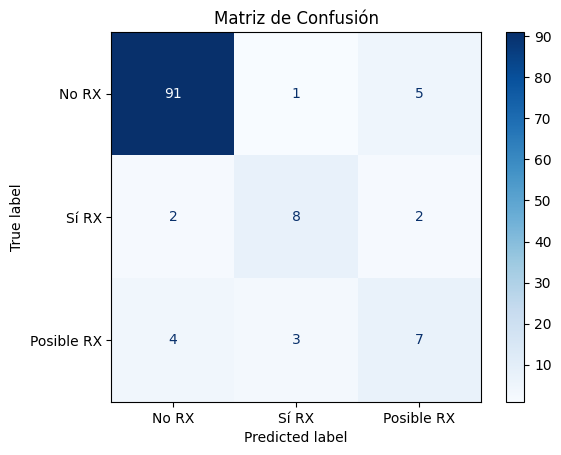

              precision    recall  f1-score   support

       No RX       0.94      0.94      0.94        97
       Sí RX       0.67      0.67      0.67        12
  Posible RX       0.50      0.50      0.50        14

    accuracy                           0.86       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.86      0.86      0.86       123



In [13]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred = modelo.predict(X_test)
ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, display_labels=["No RX", "Sí RX", "Posible RX"], cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

print(classification_report(y_test, y_pred, target_names=["No RX", "Sí RX", "Posible RX"]))


<ipython-input-14-1455899365>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


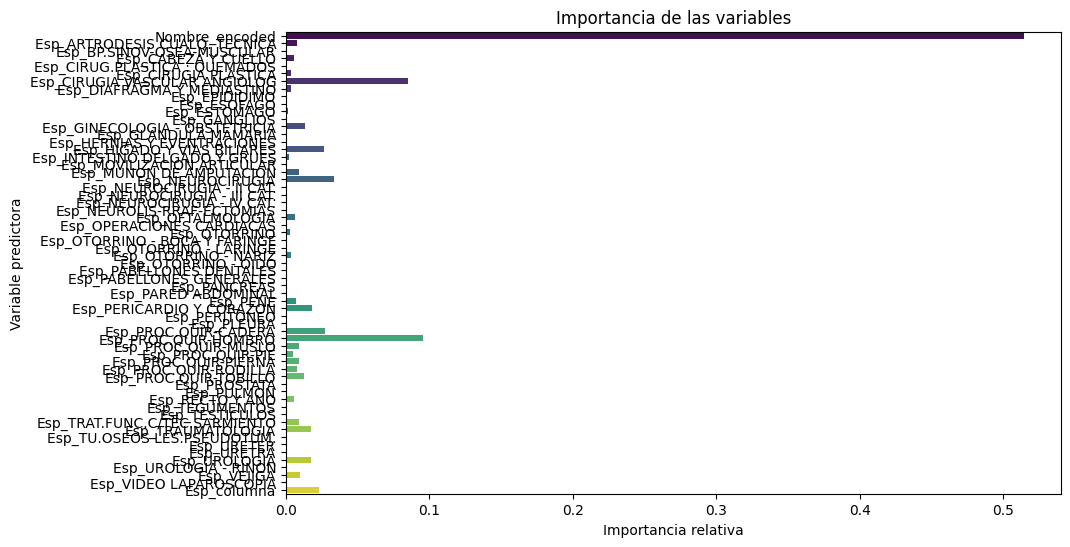

In [14]:
importances = modelo.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Importancia de las variables")
plt.xlabel("Importancia relativa")
plt.ylabel("Variable predictora")
plt.show()


<ipython-input-15-2183353096>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Clase (rayos X)", palette="pastel")


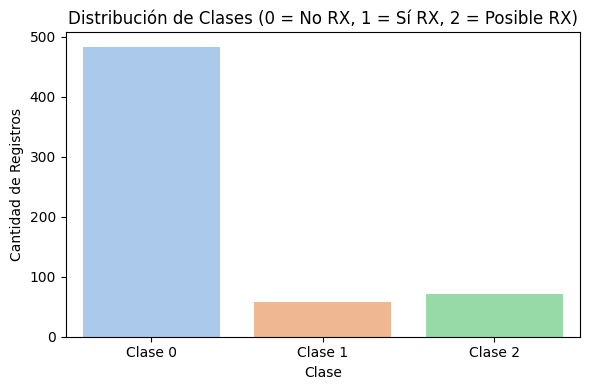

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (ajusta la ruta si tu archivo está en otra ubicación)
ruta = "/content/Dataset_Clinico_Clasificado_FINAL.xlsx"
df = pd.read_excel(ruta)

# Crear gráfico de distribución de clases
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Clase (rayos X)", palette="pastel")
plt.title("Distribución de Clases (0 = No RX, 1 = Sí RX, 2 = Posible RX)")
plt.xlabel("Clase")
plt.ylabel("Cantidad de Registros")
plt.xticks([0, 1, 2], ['Clase 0', 'Clase 1', 'Clase 2'])
plt.tight_layout()

# Guardar imagen
plt.savefig("/content/distribucion_clases.png", dpi=300)
plt.show()


In [16]:
# Calcular distribución en porcentajes y cantidad
distribucion = df["Clase (rayos X)"].value_counts(normalize=False)
porcentajes = df["Clase (rayos X)"].value_counts(normalize=True) * 100

for clase in sorted(distribucion.index):
    print(f"Clase {clase}: {distribucion[clase]} registros — {porcentajes[clase]:.1f}%")


Clase 0: 483 registros — 78.9%
Clase 1: 58 registros — 9.5%
Clase 2: 71 registros — 11.6%


In [17]:
from google.colab import files
files.download("/content/distribucion_clases.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>